## Importing Libraries

In this cell, we import the essential Python libraries for data analysis and visualization:

- **pandas:** For data manipulation and reading CSV files.
- **numpy:** For numerical operations.
- **matplotlib.pyplot & seaborn:** For creating plots and charts.

These libraries are standard in exploratory data analysis (EDA) workflows.


In [22]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Loading the Cleaned Dataset

We load the preprocessed `cleaned_sed_dataset.csv` into a Pandas DataFrame.

- This dataset was prepared in the **Data Preparation** phase.
- It contains student-level engagement metrics, behavioral features, and performance scores.
- This cell ensures our analysis uses the *cleaned* and *integrated* version of the data, without changing the original file.


In [23]:
df = pd.read_csv(r"2_data_preparation\cleaned_data\cleaned_sed_dataset.csv")
df.head()

,userid,number_of_courses_x,average_marks,average_login,weekend_login,weekday_login,midnight_login,early_morning_login,late_morning_login,afternoon_login,...,number_of_quizzes,no_of_quizzes_completed,no_of_quizzes_attempt,number_of_courses_y,total_marks,num_days_active,total_events,num_unique_courses_accessed,num_forum_posts,num_resource_views
0,64,6.0,60.483333,28.000000,4.000000,24.000000,7.166667,5.500000,5.333333,6.833333,...,2.833333,0.666667,1.333333,6.0,362.90,84.0,1650.0,6.0,16.0,273.0
1,65,6.0,53.650000,14.666667,0.833333,13.833333,4.833333,2.500000,2.333333,4.166667,...,1.500000,0.833333,1.833333,6.0,321.90,54.0,602.0,6.0,0.0,228.0
2,66,7.0,67.514286,21.000000,3.428571,17.571429,9.000000,4.428571,1.714286,5.428571,...,0.428571,0.142857,0.142857,7.0,472.60,84.0,1795.0,8.0,4.0,466.0
3,67,6.0,71.566667,19.166667,2.500000,16.666667,6.333333,2.666667,1.666667,7.833333,...,0.000000,0.000000,0.000000,6.0,429.40,55.0,1178.0,6.0,7.0,254.0
4,68,7.0,85.782857,29.000000,5.000000,24.000000,12.142857,5.571429,3.571429,7.000000,...,0.285714,0.000000,0.000000,7.0,600.48,89.0,1524.0,8.0,12.0,220.0


## Dataset Information

We use `info()` to:

- Display column names, data types, and non-null counts.
- Check for missing values.
- Ensure all columns have the expected data types.

This helps plan cleaning or transformation steps.


In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16909 entries, 0 to 16908
Data columns (total 27 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   userid                       16909 non-null  int64  
 1   number_of_courses_x          16909 non-null  float64
 2   average_marks                16909 non-null  float64
 3   average_login                16909 non-null  float64
 4   weekend_login                16909 non-null  float64
 5   weekday_login                16909 non-null  float64
 6   midnight_login               16909 non-null  float64
 7   early_morning_login          16909 non-null  float64
 8   late_morning_login           16909 non-null  float64
 9   afternoon_login              16909 non-null  float64
 10  evening_login                16909 non-null  float64
 11  night_login                  16909 non-null  float64
 12  no_of_viewed_courses         16909 non-null  float64
 13  no_of_attendance

## Descriptive Statistics

We generate summary statistics with `describe()`:

- Count, mean, standard deviation, min, and max for numeric columns.
- Reveals distribution patterns, outliers, and typical values.
- Supports forming hypotheses about data behavior.

**Observation:**
Most features have reasonable ranges with consistent counts, confirming the dataset is well-prepared for exploration and modeling.


In [25]:
df.describe(include="all")

,userid,number_of_courses_x,average_marks,average_login,weekend_login,weekday_login,midnight_login,early_morning_login,late_morning_login,afternoon_login,...,number_of_quizzes,no_of_quizzes_completed,no_of_quizzes_attempt,number_of_courses_y,total_marks,num_days_active,total_events,num_unique_courses_accessed,num_forum_posts,num_resource_views
count,16909.000000,16909.000000,16909.000000,16909.000000,16909.000000,16909.000000,16909.000000,16909.000000,16909.000000,16909.000000,...,16909.000000,16909.000000,16909.000000,16909.000000,16909.000000,16909.000000,16909.000000,16909.000000,16909.000000,16909.000000
mean,12053.889704,5.511798,68.922490,18.736798,3.354423,15.382376,5.608592,4.531241,2.512382,4.582120,...,1.811709,0.496637,5.774443,5.511798,394.248695,50.600570,752.692460,6.047991,2.790055,195.434710
std,6671.790204,2.256328,18.372104,16.560310,3.638555,13.559260,5.358189,4.348354,3.661219,4.308134,...,3.222224,0.934713,11.593263,2.256328,187.695785,27.975133,622.944374,2.467662,5.483200,176.427051
min,64.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000
25%,6687.000000,4.000000,66.766667,7.666667,1.125000,6.250000,2.000000,1.666667,0.625000,1.750000,...,0.000000,0.000000,0.000000,4.000000,250.450000,29.000000,290.000000,5.000000,0.000000,71.000000
50%,11478.000000,6.000000,73.558333,15.285714,2.500000,12.571429,4.375000,3.571429,1.500000,3.666667,...,0.428571,0.125000,0.250000,6.000000,443.000000,50.600570,642.000000,7.000000,0.000000,160.000000
75%,16557.000000,7.000000,78.678333,25.333333,4.500000,21.000000,7.750000,6.142857,3.000000,6.200000,...,2.375000,0.571429,6.500000,7.000000,534.750000,72.000000,1046.000000,8.000000,3.000000,264.000000
max,28219.000000,11.000000,100.000000,366.000000,128.000000,238.000000,107.571429,88.000000,137.000000,96.000000,...,49.285714,17.000000,174.000000,11.000000,869.640000,129.000000,6096.000000,16.000000,115.000000,2396.000000


## Checking for Missing Values

We examine the entire dataset for missing (null) values:

- `isnull().sum()` counts nulls in each column.
- Helps assess data quality and completeness.
- Guides decisions about imputation or removal of incomplete rows.

**Observation:**
In this dataset, no missing values were found in the columns, suggesting that the preprocessing step successfully handled missing data.

In [26]:
df.isnull().sum()

userid                         0
number_of_courses_x            0
average_marks                  0
average_login                  0
weekend_login                  0
weekday_login                  0
midnight_login                 0
early_morning_login            0
late_morning_login             0
afternoon_login                0
evening_login                  0
night_login                    0
no_of_viewed_courses           0
no_of_attendance_taken         0
no_of_all_files_downloaded     0
no_of_assignments              0
no_of_forum_created            0
number_of_quizzes              0
no_of_quizzes_completed        0
no_of_quizzes_attempt          0
number_of_courses_y            0
total_marks                    0
num_days_active                0
total_events                   0
num_unique_courses_accessed    0
num_forum_posts                0
num_resource_views             0
dtype: int64

## Correlation Heatmap

We compute and visualize the **correlation matrix** of all numeric features in the dataset:

* **What this plot gives us:**

  * Shows **linear relationships** between pairs of variables.
  * Color intensity highlights the **strength and direction** of correlations (positive or negative).
  * Helps spot **redundant features** (highly correlated predictors).
  * Reveals which variables might have **predictive power** for outcomes like student marks.
  * Supports **feature selection** decisions by showing potential multicollinearity.

* **Purpose in analysis:**

  * To **understand overall structure** in the data.
  * To guide **modeling choices** by suggesting variables to include or exclude.
  * To generate **hypotheses** about which factors might drive student engagement and performance.

**Observation:**
We can see certain pairs of features with moderate to strong positive correlations, which may indicate overlapping information or highlight variables useful for prediction.

We use Seaborn's `heatmap` for a clear, intuitive, color-coded visualization of these relationships.


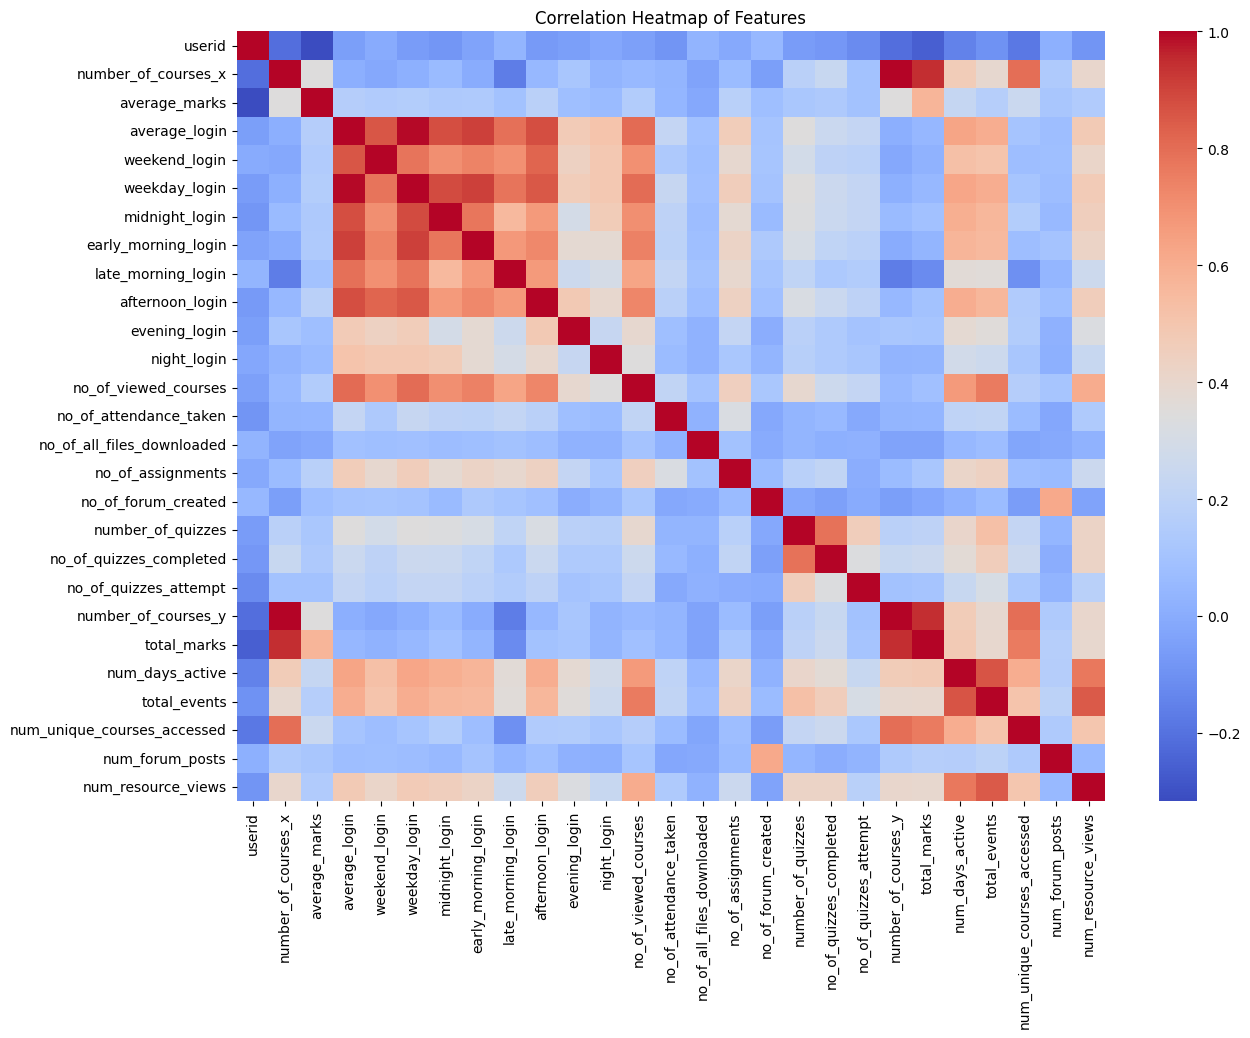

In [27]:
plt.figure(figsize=(14, 10))
sns.heatmap(df.corr(numeric_only=True), cmap="coolwarm", annot=False)
plt.title("Correlation Heatmap of Features")
plt.show()

## Distribution of Average Marks

We visualize the distribution of students’ average marks:

- Shows how grades are spread (normal, skewed, multimodal).
- Helps identify outliers and concentration of scores.
- Supports evaluating assumptions for modeling (e.g., normality).


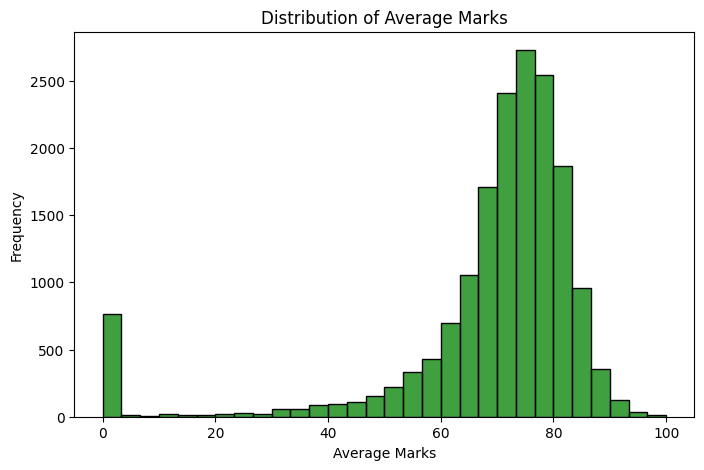

In [28]:
plt.figure(figsize=(8, 5))
sns.histplot(df["average_marks"], bins=30, color="green")
plt.title("Distribution of Average Marks")
plt.xlabel("Average Marks")
plt.ylabel("Frequency")
plt.show()

## Scatter Plot: Number of Courses vs Total Marks

We create a scatter plot to examine the relationship between **number of courses taken** and **total marks**:

- Each point represents a student.
- X-axis: number_of_courses_x (number of courses enrolled).
- Y-axis: total_marks (overall performance).

**Purpose:**

- Detect linear or nonlinear trends between course load and performance.
- Spot clusters of students with similar profiles.
- Identify outliers (e.g., students with unusually high marks for few courses).
- Reveal potential heteroskedasticity (variation of marks spread with course number).

**Observation:**
There appears to be a general positive trend, with students taking more courses often achieving higher total marks, but with considerable spread indicating other factors also influence outcomes.


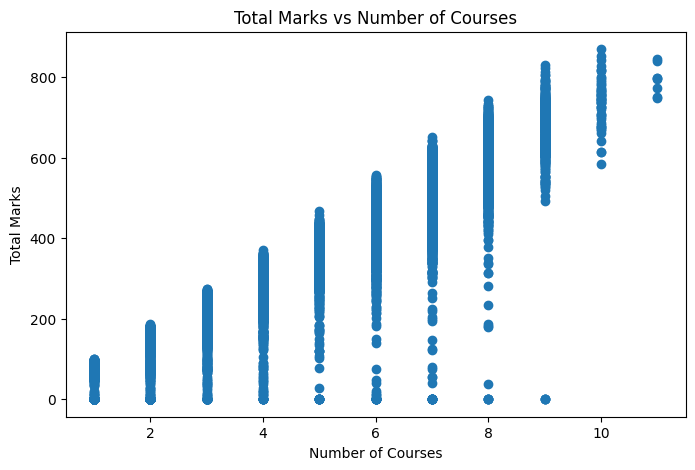

In [29]:
plt.figure(figsize=(8, 5))
plt.scatter(df["number_of_courses_x"], df["total_marks"])
plt.title("Total Marks vs Number of Courses")
plt.xlabel("Number of Courses")
plt.ylabel("Total Marks")
plt.show()

## Scatter Plot Grid: Engagement Metrics vs Average Marks

We visualize how student engagement features relate to academic performance, measured by **average marks**.

* **Each subplot** shows one engagement metric against average marks.
* **X-axis**: Average Marks (student performance).
* **Y-axis**: Engagement metric (e.g., Days Active, Total Events).
* **Transparency (alpha)** is applied to better reveal dense areas of overlapping points.

**What this plot gives us:**

* Lets us *directly see* relationships between engagement and performance.
* Highlights potential **linear or nonlinear trends**.
* Reveals **clusters, gaps, or outliers** that might suggest different student groups.
* Allows us to see if increased engagement (more days active, events, forum posts, assignments) correlates with **higher marks**.
* Useful for **hypothesis generation** about which activities are most predictive of success.

**Observation:**
These plots suggest mild positive relationships between certain engagement behaviors (e.g., number of assignments) and average marks, though variability remains high.


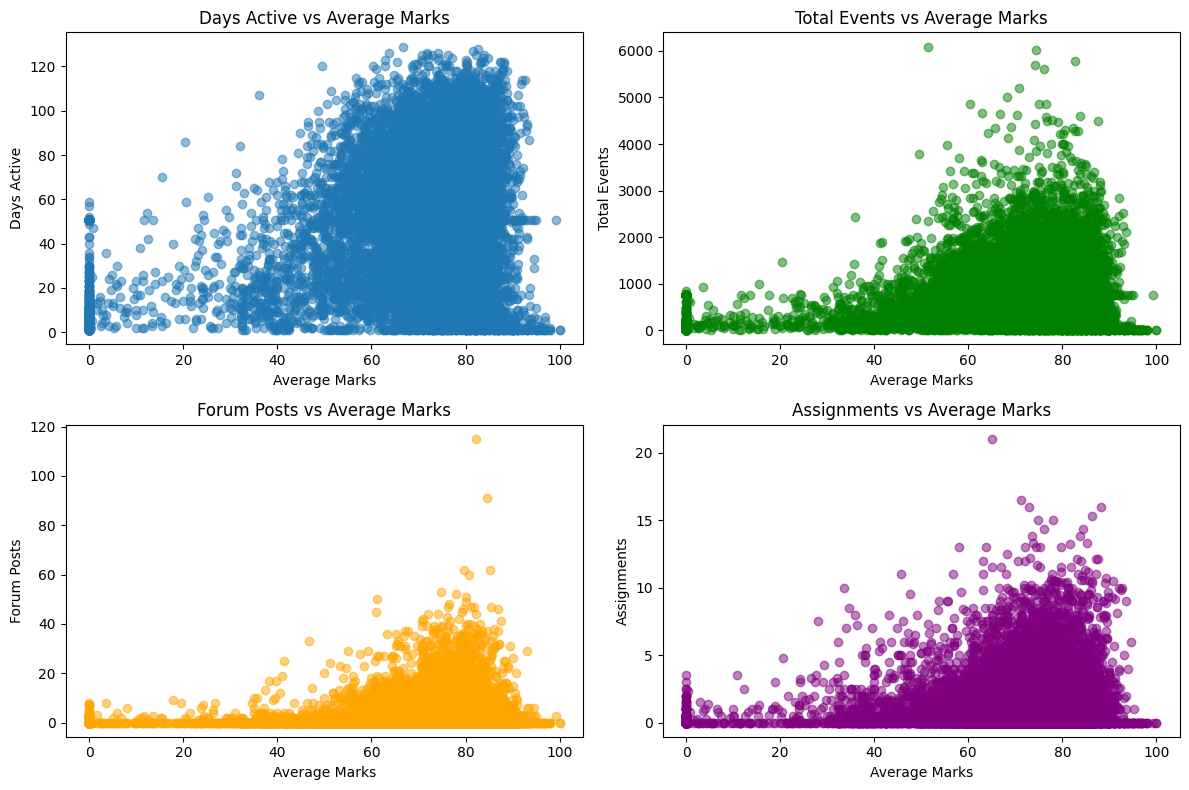

In [30]:
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

axs[0, 0].scatter(df["average_marks"], df["num_days_active"], alpha=0.5)
axs[0, 0].set_title("Days Active vs Average Marks")
axs[0, 0].set_xlabel("Average Marks")
axs[0, 0].set_ylabel("Days Active")

axs[0, 1].scatter(df["average_marks"], df["total_events"], alpha=0.5, color="green")
axs[0, 1].set_title("Total Events vs Average Marks")
axs[0, 1].set_xlabel("Average Marks")
axs[0, 1].set_ylabel("Total Events")

axs[1, 0].scatter(df["average_marks"], df["num_forum_posts"], alpha=0.5, color="orange")
axs[1, 0].set_title("Forum Posts vs Average Marks")
axs[1, 0].set_xlabel("Average Marks")
axs[1, 0].set_ylabel("Forum Posts")

axs[1, 1].scatter(
    df["average_marks"], df["no_of_assignments"], alpha=0.5, color="purple"
)
axs[1, 1].set_title("Assignments vs Average Marks")
axs[1, 1].set_xlabel("Average Marks")
axs[1, 1].set_ylabel("Assignments")

plt.tight_layout()
plt.show()

### Observations

* The dataset has no missing values.
* The target variable `average_marks` appears roughly normally distributed with slight skew.
* The correlation heatmap reveals moderate relationships between some engagement features (e.g., login behavior, activity counts) and average marks.
* Scatterplots suggest positive trends between engagement metrics such as events and forum posts and student performance.
* Next step: formal modeling to quantify and predict these relationships.